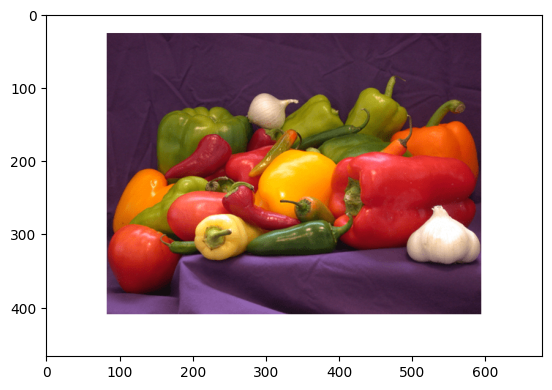

In [19]:
import matplotlib.pyplot as plt

im = plt.imread("data/peppers.png")[:,:,:3]
plt.imshow(im)

## We are going to use KMeans to Segment this color image

In [12]:
def kmeansp(data,k=7):
    
    # Step 1: Choosing random points to be clusters
    depth = 3
    k = 7
    # centroids = np.zeros((7,depth))
    centroids =data[random.sample(range(data.shape[0]), 1)]
    print(data.shape)
    for i in range(k-1):
        distances = distance(data.reshape(-1,1,depth),centroids.reshape(1,-1,depth))
        # find closest centroids for each poitn
        labels = np.argmin(distances,axis=1)
        total_distance = 0
        current_prob = []
        for i in range(labels.shape[0]):
            # distance from this point to the nearest centroid / total distance
#             print(centroids.shape)
#             print(labels[i])
            current_distance = np.sum((data[i].reshape(-1,depth)-centroids[labels[i],:])**2)
            total_distance = total_distance + current_distance

        for i in range(labels.shape[0]):
            # distance from this point to the nearest centroid / total distance
            current_prob.append(np.sum((data[i].reshape(-1,depth)-centroids[labels[i],:])**2)/total_distance)
        centroid_new = data[np.argmax(current_prob)]
        # update centroid
        centroids = np.vstack((centroids.reshape(-1,depth),centroid_new))
    centroids = centroids.reshape(1,k,-1)
    start = time.time()
    data = data.reshape(-1,1,depth)
    # creating an array to store labels
    labels = np.zeros(len(data),dtype=np.float32)
    previous_labels = np.zeros(len(data))
    comparison = np.zeros(len(data),dtype='bool')
    i = 0;
    while(comparison.all() != True):
        # if exceed 200 iterations break the loop
        if (i>200):
            break
        # Step 2: Assigning each point to its closest centroid
        # calculating distance
        distances = distance(data,centroids)
        print(distances.shape)
        # find closest centroids for each poitn
        previous_labels = labels.copy()
        labels = np.argmin(distances,axis=1)
        #Step 3: updating centroids
        for center in range(k):
            centroids[0,center,:] = np.mean(data[labels==center].reshape(-1,depth),axis=0)

        # compare to see if no new points are reassigned => if the centroids are not updated
        comparison = (labels == previous_labels)
        i = i+1
    stop = time.time()
    print(stop-start)
    return centroids,labels

In [13]:
def img_2_data(path):
    img = cv2.imread(path)
    img = img.astype('uint8')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
    n, d, _ = img.shape
    X = img.reshape((n*d, -1)).astype('int')
    return X, img
def distance(x, centroid):
    # Compute the difference, following by raising to power 2 and summing
    dist = ((x - centroid) ** 2).sum(axis = 2)   # change of axis
    
    return dist

In [14]:
import cv2
import random
import numpy as np
img2_path = "data/peppers.png"
X, img = img_2_data(img2_path)
import time
start = time.time()

centroids , labels = kmeansp(X,13)
stop = time.time()
# labels = labels.reshape(data1.shape[0]*data1.shape[1])
# flatten the labels array
labels = labels.flatten()
segmented_image = centroids[0,labels.flatten()]

(316626, 3)


C:\Users\phamp\AppData\Local\Temp\ipykernel_16728\1828251423.py:20: RuntimeWarning: overflow encountered in long_scalars
  total_distance = total_distance + current_distance


(316626, 7)
(316626, 7)
(316626, 7)
(316626, 7)
(316626, 7)
(316626, 7)
(316626, 7)
(316626, 7)
(316626, 7)
(316626, 7)
(316626, 7)
(316626, 7)
(316626, 7)
(316626, 7)
(316626, 7)
(316626, 7)
1.3507637977600098


In [15]:
labels = labels.reshape(467,678)

In [16]:
from skimage import color
from skimage import segmentation

In [20]:
rs = color.label2rgb(labels,im) # color each pixel according to its label

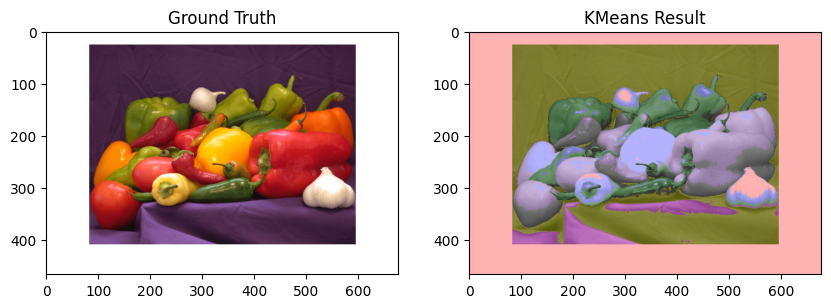

In [21]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title("Ground Truth")
plt.imshow(im)
plt.subplot(122)
plt.title("KMeans Result")
plt.imshow(rs)

### Do you think KMeans results are approriate?